In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
num_modes = 10
mode_list = 1+np.arange(num_modes)

## Pluck the string...

In [56]:
x = np.sqrt(0.5) #0.4 # position on the string
# TODO make this a slider

In [72]:
amplitudes = np.sin(mode_list*np.pi*x)

# Plot the string

In [9]:
# pre-calculate a bunch of sines
num_steps = 101
positions = np.linspace(0.0,1.0,num_steps,endpoint=True)
phase_array = np.outer(positions,mode_list)*np.pi
sine_array = np.sin(phase_array)

In [57]:
sine_array[:,:10].shape

(101, 10)

## TODOs

- Sound

In [68]:
def plot():
    ''' calculate and do the plot '''
    
    
    
    # set up figure grid
    fig = plt.figure(figsize=(10,4))
    gs = plt.GridSpec(1,2,width_ratios=[1,2])
    ax = [fig.add_subplot(g) for g in gs]

    # plot the amplitudes
    ax[0].bar(mode_list,amplitudes,width=0.5)
    ax[0].axhline(0,0,1,c='k',lw=0.5)
    ax[0].set_xticks(mode_list)
    ax[0].set_xlabel("Mode number")
    ax[0].set_ylabel("Amplitude")
    ax[0].set_title("Mode amplitudes")
    #fig.show()

    #max_plot_modes = 10

    # calculate the curves
    for i in range(num_modes):
        ax[1].plot(positions,amplitudes[i]*np.sin(phase_array[:,i]),alpha=0.7*np.abs(amplitudes[i])**2,color='r',lw=1)
    ax[1].plot(positions,np.sum(sine_array*amplitudes,axis=1),'k',lw=2)
    ax[1].set_xlim(0,1)
    ax[1].axvline(x,0,1,c='k',ls='dotted')
    ax[1].axhline(0,0,1,c='k',lw=0.5)
    ax[1].set_xlabel("Position (x/L)")
    ax[1].set_ylabel("Amplitude")
    ax[1].set_title("String shape")
    


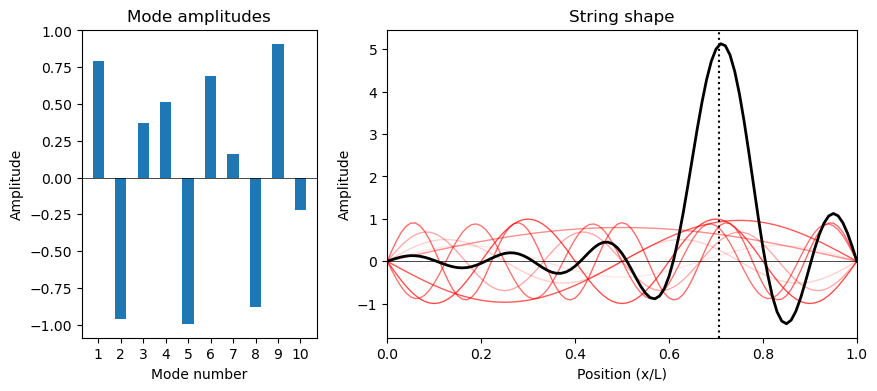

In [69]:
plot()

# Make some sound

In [70]:
# constants for sound generation
f1 = 440. # fundamental mode frequency in Hz
duration = 1.0 # duration of tone in seconds


In [71]:
# sampling constants
sample_rate = 22050 # sample rate of sound in samples per second
sample_length = duration * sample_rate
time_step = 1./sample_rate

In [85]:
times = np.arange(sample_length)*time_step
def thistime(t):
    return np.sum(amplitudes*np.sin(2*np.pi*f1*np.outer(mode_list,t)).T,axis=1)

In [87]:
thistime(times).shape

(22000,)

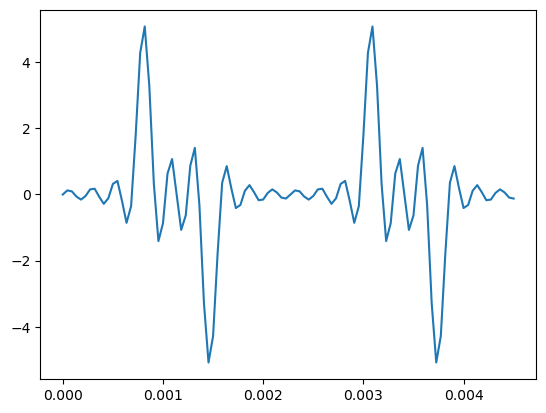

In [88]:
plt.plot(times[:100],thistime(times[:100]))